# SPRING 2021
# Applied Machine Learning, Final Exam Solutions

**Problem 1** 
1. Create a new Pandas data frame called `poly` using the CSV file available at the following URL:

In [ ]:
URL_1="https://raw.githubusercontent.com/graf10a/Applied-Machine-Learning-Course/main/Data/poly.csv"

In [ ]:
import pandas as pd
poly=pd.read_csv(URL_1)

2. Let's get familiar with the data. Begin by printing to the screen to total number of rows and columns in `poly`. 

In [ ]:
poly.shape

(1000, 2)

3. Print to the screen the first five rows of the data frame.

In [ ]:
poly.head()

,x,y
0,-527.527528,-2.444923
1,-945.945946,-8.730179
2,79.079079,0.307923
3,795.795796,4.009301
4,-407.407407,-2.371207


4. Print to the screen a summary showing the column names, the number of non-null entries and the data types for each column of `poly`. This must be done using a single Pandas method. Carefully inspect the results.

In [ ]:
poly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       989 non-null    float64
 1   y       1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


5. Print to the screen a summary showing the total number of missing values in each column of `poly`.

In [ ]:
poly.isna().sum()

x    11
y     0
dtype: int64

6. Remove the rows containing missing values from the data frame and then demonstrate that `poly` is now free of missing values.

In [ ]:
poly.dropna(inplace=True)
poly.isna().sum().sum()

0

7. Create a 70-30 split of the data into a training set and test set treating the `y` column as the target variable and the `x` column as the feature variable.

In [ ]:
from sklearn.model_selection import train_test_split

X=poly['x'].values.reshape(-1, 1)
y=poly['y'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42,
                                                    )

8. Fit a Decision Tree and a Random Forest regression models on the training data setting `min_samples_leaf=10` and `random_state=42` for both models.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

msl=10

tree=DecisionTreeRegressor(min_samples_leaf=msl, 
                           random_state=42)
tree.fit(X_train, y_train)

rf=RandomForestRegressor(min_samples_leaf=msl, 
                         random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

9. Use the models trained in the previous step to predict target values for the test set; compute and print to the screen the resulting $R^2$ scores.

In [ ]:
from sklearn.metrics import r2_score

y_pred_tree=tree.predict(X_test)
y_pred_rf=rf.predict(X_test)

r2_tree=r2_score(y_test, y_pred_tree)
r2_rf=r2_score(y_test, y_pred_rf)

print(f"The R^2 score for the Decision Tree model = {r2_tree:.5f}")
print(f"The R^2 score for the Random Forest model = {r2_rf:.5f}")  

The R^2 score for the Decision Tree model = 0.70163
The R^2 score for the Random Forest model = 0.73059


10. Create a plot showing all original data points for the test set (set `ms=3`) and the best fit curves for these data obtained with both Decision Tree and Random Forest regressors introduced in item 8. Label your horizontal and vertical axes as "x" and "y", respectively, and add a title to the plot saying "Regression plot" (use some reasonable settings for `fontsize`). To create the best fit curve follow these steps:
  * Use `np.linspace` to create an array of 100 evenly spaced values between the smallest and the largest values of `X_test` (make the limiting values inclusive). Call this array `x_grid`.
  * For both Decision Tree and Random Forest regressors, predict the target values on `x_grid` using an appropriate sklearn method. Save the results as `y_grid_tree` and `y_grid_rf`, respectively.
  * On the same set of axes, plot `y_grid_tree` versus `x_grid` in red color and `y_grid_rf` versus `x_grid` in green color; set `linewidth=2` and label the plots as *Decision Tree* and *Random Forest*, respectively.
  * Create a legend for the best fit curves stating the names of the regressor used to create them (*Decision Tree* and *Random Forest*).

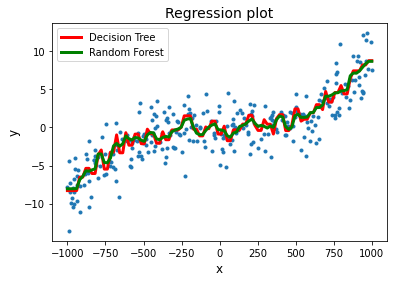

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x_grid=np.linspace(X_test.min(), X_test.max(), 100).reshape(-1, 1)
y_grid_tree=tree.predict(x_grid)
y_grid_rf=rf.predict(x_grid)

plt.plot(X_test, y_test, 'o', ms=3)
plt.plot(x_grid, y_grid_tree, '-', color='red', 
         linewidth=3, label='Decision Tree')
plt.plot(x_grid, y_grid_rf, '-', color='green', 
         linewidth=3, label='Random Forest')

plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Regression plot', fontsize=14)

plt.legend()

plt.show()

**Problem 2**
1. Create a new Pandas data frame called `heart` using the CSV file available at the following URL:

In [ ]:
URL_2='https://raw.githubusercontent.com/graf10a/Applied-Machine-Learning-Course/main/Data/heart.csv'

In [ ]:
heart=pd.read_csv(URL_2)

2. Let's get familiar with the data. Begin by printing to the screen to total number of rows and columns in `heart`. 

In [ ]:
heart.shape

(303, 14)

3. Print to the screen the first five rows of the data frame.

  You should see that the data set contains information about 303 patients summarized in 14 columns. The `target` column contains information about the possibility of a heart attack for a given patient: 0 stands for a smaller chance of a heart attack and 1 stands for a larger chance of a heart attack. The remaining 13 columns contains a set of numerical and categorical values describing the patient -- the meaning of some of these columns should be clear from their names (e.g. `age`, `sex`), the meaning of others might look obscure but this is not going to stop us from building a classification model on these data.

In [ ]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


4. Print to the screen a summary showing the column names, the number of non-null entries and the data types for each column of `heart`. This must be done using a single Pandas method. Carefully inspect the results: are there any missing values in the data set? (Answer this question in the text cell provided below.)

In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


**Your answer about missing values:** No, there are no missing values in the data set because the total number of non-null entries is the same as the total number of entries for each column of this data set.

5. Identify all columns that contain less that 6 unique values -- these are going to be our categorical columns. There are many ways how you can find these columns -- using a NumPy or Pandas interface, running a for-loop for all columns at once or printing the unique values in a column-by-column fashion, etc. I am leaving it up to you what approach to choose (it is possible to do it in just 3-4 lines of code).

In [ ]:
for col in heart.columns:
  n_unq=len(heart[col].unique())
  if n_unq < 10:
    print(f"The columns {col} contains {n_unq} unique values.")

The columns sex contains 2 unique values.
The columns cp contains 4 unique values.
The columns fbs contains 2 unique values.
The columns restecg contains 3 unique values.
The columns exang contains 2 unique values.
The columns slope contains 3 unique values.
The columns ca contains 5 unique values.
The columns thal contains 4 unique values.
The columns target contains 2 unique values.


6. If you did the previous step correctly, you should have seen that there are 4 binary columns in the data frame, `['sex', 'fbs', 'exang', 'target']`; the remaning 5 categorical columns, `['cp', 'restecg', 'slope', 'ca', 'thal']`, have more than two categories each. Demonstrate that the binary columns `['sex', 'fbs', 'exang', 'target']` contain only 0's and 1's (again, it is possible to do it in just 3 lines of code -- I am leaving details up to you). 

In [ ]:
for col in ['sex', 'fbs', 'exang', 'target']:
  print(f"{col}:")
  print(heart[col].value_counts())

sex:
1    207
0     96
Name: sex, dtype: int64
fbs:
0    258
1     45
Name: fbs, dtype: int64
exang:
0    204
1     99
Name: exang, dtype: int64
target:
1    165
0    138
Name: target, dtype: int64


7. Build two two-step pipelines: 
  * the first step of both pipelines is the same: in this step, you must one-hot-encode the categorical features `['cp', 'restecg', 'slope', 'ca', 'thal']` (the corresponding index values are `[2, 6, 10, 11, 12]`);
  * the second step must contain a Random Forest classifier for the first pipeline and a Decision Tree classifier for the second one; set `random_state=42` for both of these classifiers.

  *Hint:* for the first step, make use of the `ColumnTransformer()` class.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer([
                        ('oh', 
                         OneHotEncoder(dtype=np.uint8),
                         [2, 6, 10, 11, 12])
                        ])

pipe_rf = Pipeline([
                    ('ct', ct), 
                    ('rf', RandomForestClassifier(random_state=42))
                    ])

pipe_tree = Pipeline([
                    ('ct', ct), 
                    ('rf', DecisionTreeClassifier(random_state=42))
                    ])

8. Compute the average across folds 5-fold cross-validated F1 score on the full data (do not perform train-test split) for the pipeline with the Decision Tree classifier; print the result to the screen.

  *Hint:* set `scoring='f1'`.

In [ ]:
from sklearn.model_selection import cross_val_score

X=heart.iloc[:, :-1].values
y=heart.iloc[:, -1].values

cross_val_score(pipe_tree, X, y, scoring='f1', cv=5).mean()

0.7914493349787468

9. Repeat the previous item for the pipeline with the Random Forest classifier.

In [ ]:
cross_val_score(pipe_rf, X, y, scoring='f1', cv=5).mean()

0.843185310080613

**Problem 3**

1. Create a new Pandas data frame called `clust` using the CSV file available at the following URL:

In [ ]:
URL_3='https://raw.githubusercontent.com/graf10a/Applied-Machine-Learning-Course/main/Data/clust.csv'

In [ ]:
clust=pd.read_csv(URL_3)

2. Check the number of rows and columns in `clust` and print the result to the screen.

In [ ]:
clust.shape

(500, 2)

3. Print the first five rows of `clust` to the screen.

In [ ]:
clust.head()

,x1,x2
0,-1.403199,-5.171994
1,-3.360739,0.384187
2,-6.564971,-5.330497
3,-8.576025,9.927181
4,-9.427233,7.600785


4. Demonstrate that there are no missing values in `clust`.

In [ ]:
clust.isna().sum().sum()

0

5. In this problem, you are not given any target variable -- this is an example of *unsupervised machine learning*. The data frame `clust` contains only two columns, so the data points can be easily plotted on a plane. But first, you must determine the optimal number of clusters using the *elbow plot*. To do that:

  * Set up a `for`-loop interating over the number of clusters `n` in the range from 1 to 25 (inclusive) and fitting a k-Means Clustering model on the `clust` data for each value of `n`; 
  * In each cycle of the `for`-loop, compute the *inertia* parameter and save it in a list; save the current number of clusters `n` into another lists. 
  * After the `for`-loop is finished plot the inertia as a function of the number of clusters. 
  * Create some meaningful labels for the axes and title.
  * To read off the optimal number of clusters from your plot, limit the range of the $y$-values to $[0, 1000]$ by including the `plt.ylim(0, 1000)` command in your code. 
  * Now, you should be able to see the optimal number of clusters very clearly -- add a vertical red dashed line marking this value.

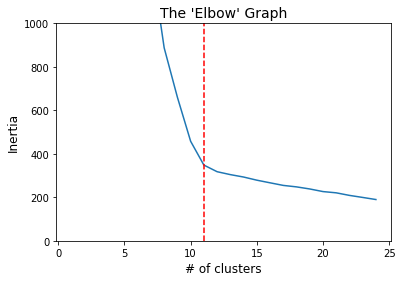

In [ ]:
from sklearn.cluster import KMeans

X=clust.values

nclust=[]
inertia=[]

for n in range(1, 26):
  km=KMeans(n_clusters=n)
  km.fit(X)
  nclust.append(n)
  inertia.append(km.inertia_)

plt.plot(nclust, inertia, '-')
plt.title("The 'Elbow' Graph", fontsize=14)
plt.xlabel("# of clusters", fontsize=12)
plt.ylabel("Inertia", fontsize=12)

plt.axvline(x=11, ls='--', color='red')

plt.ylim(0, 1000)

plt.show()

6. Use the k-Means Clustering algorithm to split the data into the optimal number of clusters found in the previous step and plot the result in the form of a two-dimensional scatter plot coloring the data points based on their cluster association (set `s=5` in the `plt.scatter()` function). Your plot must also show red dots marking the locations of the cluster centers; use `s=50` and `alpha=0.7` for the cluster centers.

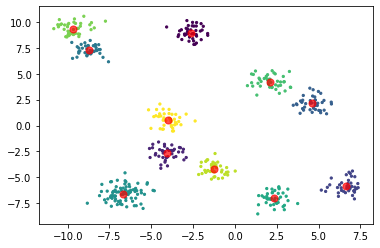

In [ ]:
km=KMeans(n_clusters=11)
km.fit(X)
y=km.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y, s=5)

centers=km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', alpha=0.7, s=50)

plt.show()